# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

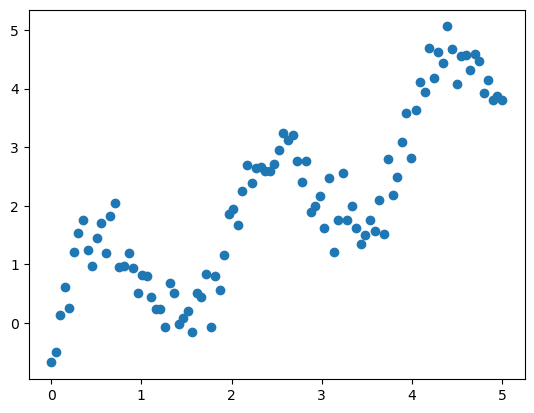

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.670328343699152


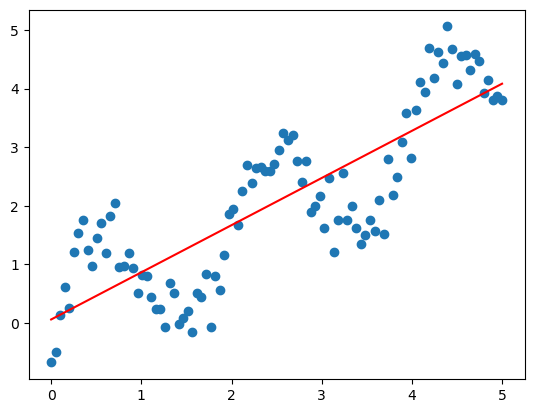

In [30]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [31]:
print(x.shape)

(100,)


In [32]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [34]:
regr_poly = LinearRegression()

In [35]:
regr_poly.fit(X_poly, y)

LinearRegression()

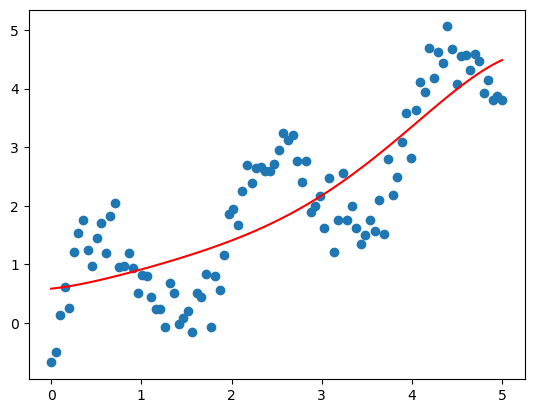

In [36]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [37]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [ 0.15893778  0.28462041 -0.16056642  0.0505566  -0.00497101]
interception:  0.5836525047174592


In [38]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.5836525 , 0.59238531, 0.60245055, 0.61373572, 0.62613581,
       0.6395531 , 0.65389702, 0.66908387, 0.68503669, 0.70168505,
       0.71896483, 0.73681805, 0.75519267, 0.77404236, 0.79332637,
       0.81300927, 0.83306079, 0.85345561, 0.87417319, 0.89519751,
       0.91651696, 0.93812407, 0.96001535, 0.9821911 , 1.00465519,
       1.02741489, 1.05048064, 1.07386589, 1.09758689, 1.12166247,
       1.14611389, 1.17096461, 1.19624011, 1.22196768, 1.24817622,
       1.2748961 , 1.30215886, 1.32999713, 1.35844434, 1.38753457,
       1.41730236, 1.44778249, 1.47900979, 1.51101895, 1.54384432,
       1.57751973, 1.61207826, 1.64755207, 1.68397221, 1.7213684 ,
       1.75976884, 1.79920003, 1.83968656, 1.88125092, 1.9239133 ,
       1.96769139, 2.01260019, 2.05865184, 2.10585535, 2.15421649,
       2.20373755, 2.25441712, 2.30624996, 2.35922675, 2.41333392,
       2.46855343, 2.52486259, 2.58223389, 2.64063476, 2.70002737,
       2.76036849, 2.82160924, 2.88369492, 2.94656481, 3.01015

In [16]:
regr_poly.predict(X_poly)

array([0.5836525 , 0.59238531, 0.60245055, 0.61373572, 0.62613581,
       0.6395531 , 0.65389702, 0.66908387, 0.68503669, 0.70168505,
       0.71896483, 0.73681805, 0.75519267, 0.77404236, 0.79332637,
       0.81300927, 0.83306079, 0.85345561, 0.87417319, 0.89519751,
       0.91651696, 0.93812407, 0.96001535, 0.9821911 , 1.00465519,
       1.02741489, 1.05048064, 1.07386589, 1.09758689, 1.12166247,
       1.14611389, 1.17096461, 1.19624011, 1.22196768, 1.24817622,
       1.2748961 , 1.30215886, 1.32999713, 1.35844434, 1.38753457,
       1.41730236, 1.44778249, 1.47900979, 1.51101895, 1.54384432,
       1.57751973, 1.61207826, 1.64755207, 1.68397221, 1.7213684 ,
       1.75976884, 1.79920003, 1.83968656, 1.88125092, 1.9239133 ,
       1.96769139, 2.01260019, 2.05865184, 2.10585535, 2.15421649,
       2.20373755, 2.25441712, 2.30624996, 2.35922675, 2.41333392,
       2.46855343, 2.52486259, 2.58223389, 2.64063476, 2.70002737,
       2.76036849, 2.82160924, 2.88369492, 2.94656481, 3.01015

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [17]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [18]:
sigma = 0.3

In [21]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [22]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

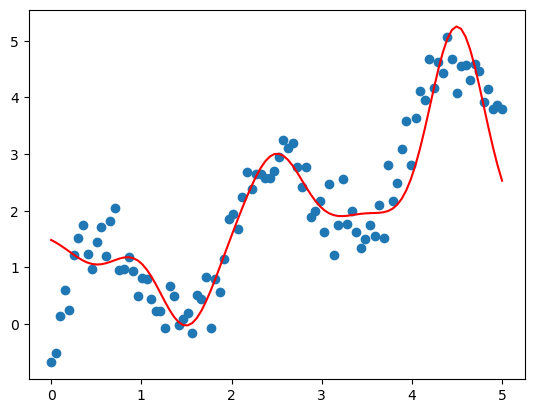

In [23]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [24]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.56802923 -1.65502687  1.38634934  0.30971928  3.62473538]
interception:  1.627240896875516


#### Comparison

In [25]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

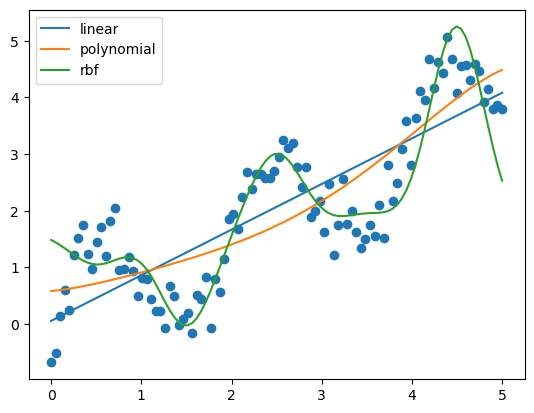

In [26]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [27]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.670328343699152


In [28]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.6015900029282186


In [29]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.33248336766615005
